Import necessary libraries

In [1]:
from sqlalchemy import create_engine
from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey
from sqlalchemy  import Sequence
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
from config import username , password
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [2]:
dbname='SQL_HW'
servername='localhost'
username = "postgres"
password = "postgres"
port=5432
conn_string = f'postgres://{username}:{password}@{servername}:{port}/{dbname}'
engine = create_engine(conn_string , echo = False)
conn = engine.connect()

In [3]:
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table

In [5]:
salary_info = create_pandas_table("select emp_no, salary from salaries order by salary")
salary_info = salary_info.fillna(value = 0)
salary_info

,emp_no,salary
0,42589,40000
1,68253,40000
2,44127,40000
3,26876,40000
4,44124,40000
...,...,...
300019,37558,125469
300020,458302,126703
300021,444756,127041
300022,44188,127238


Text(0, 0.5, 'Number of Employees')

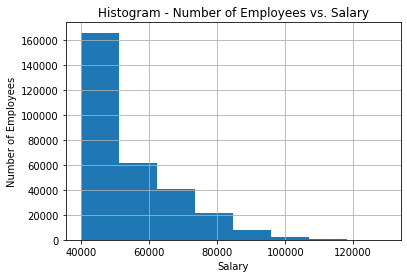

In [6]:
salary_info.hist(column = 'salary', bins = 8, figsize = (6,4))
plt.title("Histogram - Number of Employees vs. Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")

In [7]:
salary_title = create_pandas_table('''select titles.title, salaries.salary
                                    from employees
                                    inner join salaries on
                                    employees.emp_no = salaries.emp_no
                                    inner join titles on
                                    employees.emp_title_id = titles.title_id''')
st_avg = salary_title.groupby(['title']).mean()
st_avg

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


Text(0, 0.5, 'Average Salary')

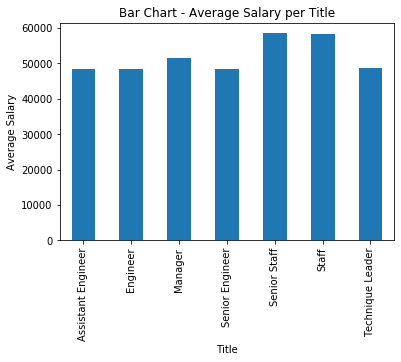

In [8]:
st_avg.plot.bar(legend = None)
plt.title("Bar Chart - Average Salary per Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")

In [9]:
conn.close()